<a name = "inicio"></a>
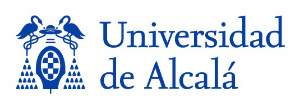

__[<img src="https://www.interactivechaos.com/sites/default/files/2019-02/portada_tutorial_pandas.jpg">](https://www.interactivechaos.com/course/tutorial-de-pandas)__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# Herramientas de visualización
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Una cierta limitación de matplotlib es su falta de integración con pandas. Sin embargo, pandas sí ofrece la funcionalidad de matplotlib a través de un conjunto de funciones y de métodos asociados a los dataframes.

Aunque mi recomendación es recurrir a seaborn siempre que sea posible y las herramientas más comunes que ofrece pandas (histogramas, gráficos de barras, etc.) quedan mejor cubiertas en el documento dedicado a matplotlib, vamos a hacer un recorrido rápido por éstas.

Pandas incluye la sublibrería pandas.plotting conteniendo herramientas para la visualización de datos multidimensionales. Vamos a ver las siguientes tres funciones:

* scatter_matrix
* radviz
* parallel_coordinates

Carguemos el dataset *iris* proveído por seaborn:

In [3]:
iris = sns.load_dataset("iris")

### La función scatter_matrix

La función [pandas.plotting.scatter_mattrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) muestra una matriz de gráficos de dispersión cruzando las características cuantitativas del dataframe indicado:

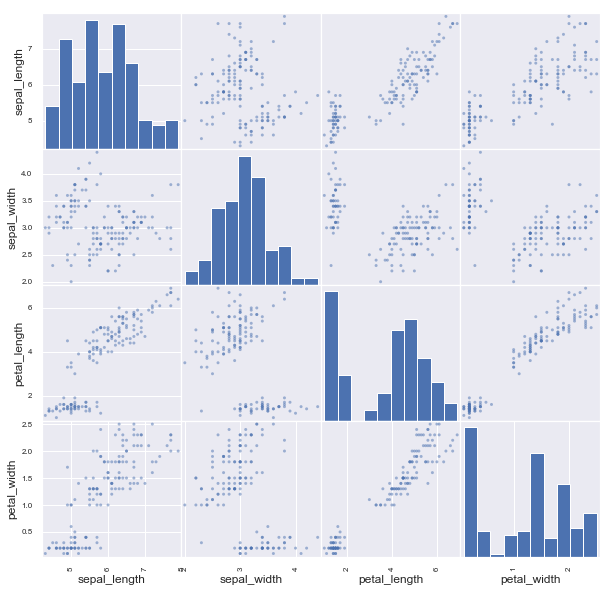

In [4]:
pd.plotting.scatter_matrix(iris, figsize = (10, 10));

### La función radviz

El algoritmo **RadViz** permite proyectar un conjunto de datos multidimensional en un espacio de dos dimensiones y la función [pandas.plotting.radviz](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.radviz.html) implementa este algoritmo, mostrando una gráfica de dos dimensiones con información del dataframe incluido como argumento.

Las características del dataframe son representadas distribuidas uniformemente a lo largo de la circunferencia de un círculo. Cada muestra del dataframe se representa en el interior del círculo de acuerdo con el valor en cada serie según una metáfora física: cada punto se supone unido a cada característica con una fuerza que es proporcional al valor que dicha muestra toma en la serie correspondiente, de forma que la posición final es la posición de equilibrio entre todas las fuerzas que representan las características.

Puedes acceder al artículo original aquí:

http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.135.889

Veamos qué resultado ofrece esta función aplicada al dataset *iris*:

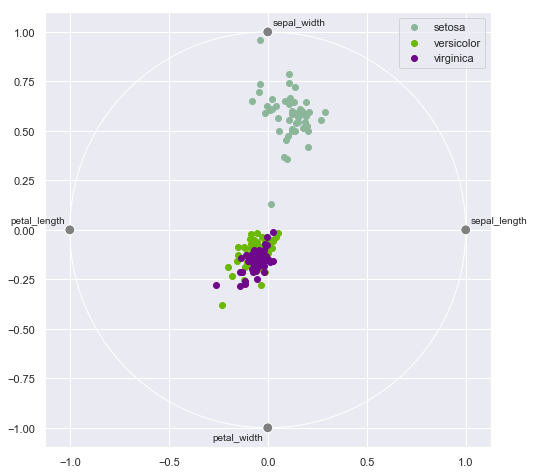

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
pd.plotting.radviz(iris, "species", ax = ax);

Intuitivamente podemos ver que la característica "*sepal_width*" toma valores proporcionalmente más elevados en la especie setosa que en versicolor o en virginica, pues los puntos correspondientes a este tipo de flor se muestran más próximos a esta característica que a las otras dos. Podemos confirmar este hecho fácilmente:

In [6]:
iris.groupby("species")["sepal_width"].mean()

species
setosa        3.428
versicolor    2.770
virginica     2.974
Name: sepal_width, dtype: float64

### La función parallel_coordinates

La función [pandas.plotting.parallel_coordinates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.parallel_coordinates.html) implementa el gráfico de [coordenadas paralelas](https://en.wikipedia.org/wiki/Parallel_coordinates), útil para trazar datos numéricos multivariados y comparar variables y sus relaciones.

En estos gráficos, cada característica recibe su propio eje, colocados verticalmente, y las muestras se representan como líneas entre los ejes:

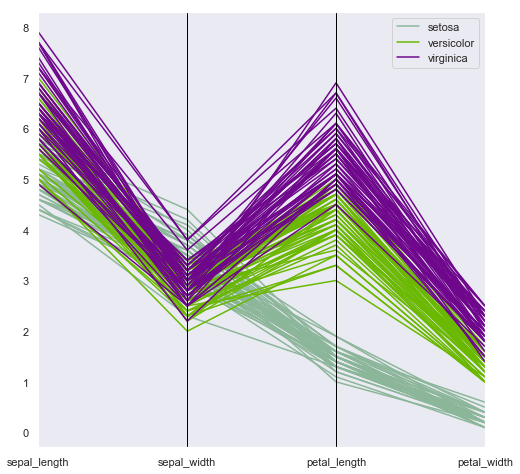

In [7]:
fig = plt.figure(figsize = (8, 8))
pd.plotting.parallel_coordinates(iris, "species");

### El método plot

El método [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) no es más que un envoltorio de la función [matplotlib.pyplot.plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html):

In [8]:
s = pd.Series(np.random.randn(100).cumsum())

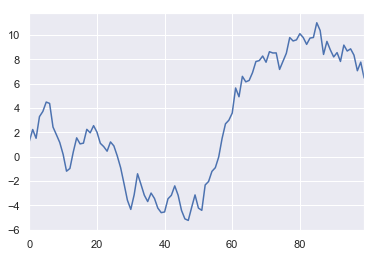

In [9]:
s.plot();

Incluye el parámetro **kind** que determina el tipo de gráfica a generar (el valor por defecto es "*line*", correspondiente a un gráfico de líneas):

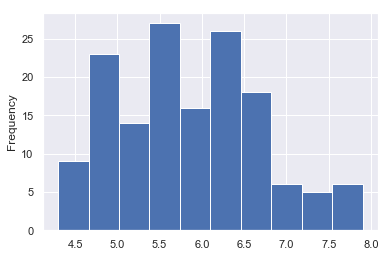

In [10]:
iris.sepal_length.plot(kind = "hist");

Desde la versión 0.17 de pandas, cada tipo de gráfica generada para los posibles valores del parámetro **kind** tienen un método equivalente. De esta forma, df.plot(kind = "pie") es equivalente a df.plot.pie().

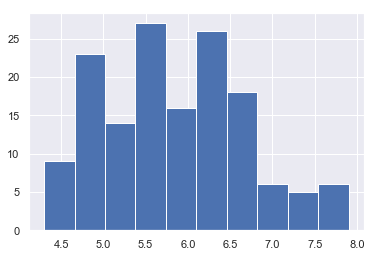

In [11]:
iris.sepal_length.hist();

#### Otros parámetros

Esta función incluye otros parámetros que pueden resultar muy interesantes en determinadas situaciones. Repasemos algunos:

* **figsize**: tupla que determina el tamaño de la figura en pulgadas:

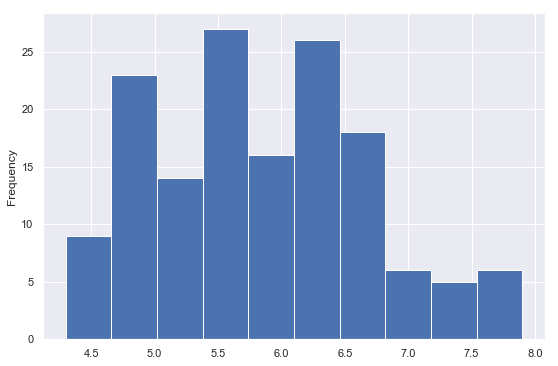

In [12]:
iris.sepal_length.plot(kind = "hist", figsize = (9, 6));

* **subplots**: booleano (que toma por defecto el valor *False*). Determina si hay que crear diferentes gráficas para cada columna:

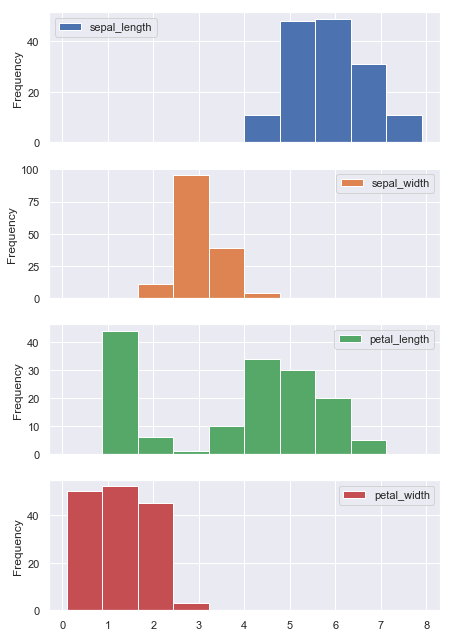

In [13]:
iris.plot(kind = "hist", figsize = (7, 11), subplots = True);

* **layout**: tupla indicando en cuántas filas y columnas deberán mostrarse las gráficas:

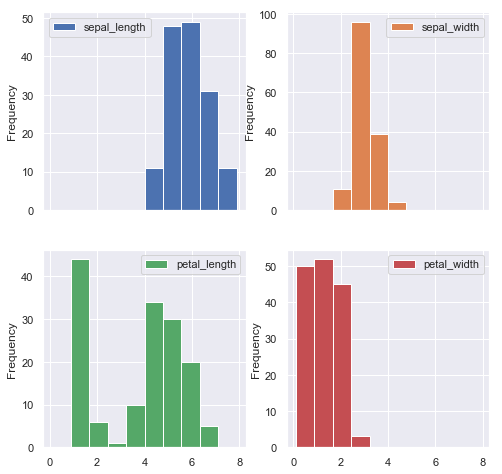

In [14]:
iris.plot(kind = "hist", subplots = True, figsize = (8, 8), layout = (2, 2));

* **xlim**, **ylim**: tuplas indicando los límites a aplicar a los ejes x e y respectivamente:

In [15]:
s = pd.Series(np.random.randn(100).cumsum())

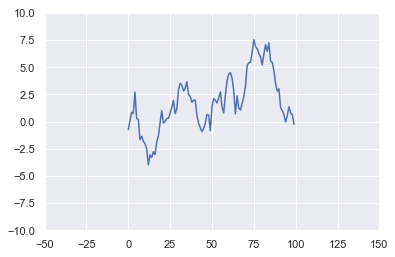

In [16]:
s.plot(xlim = (-50, 150), ylim = (-10, 10));

### El método plot.bar

El método [pandas.DataFrame.plot.bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) muestra una gráfica de barras verticales:

In [17]:
df = pd.DataFrame({
    "mes": ["ene", "feb", "mar", "abr"],
    "ventas": [17, 26, 11, 9]
})
df

,mes,ventas
0,ene,17
1,feb,26
2,mar,11
3,abr,9


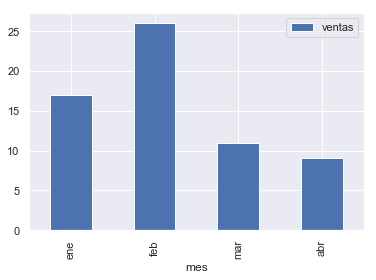

In [18]:
df.plot.bar("mes", "ventas");

### El método plot.barh

El método [pandas.DataFrame.plot.barh](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) tiene un comportamiento prácticamente idéntico al del método *df.plot.bar* (incluso los parámetros tienen el mismo orden). La única diferencia es que la gráfica de barras resultante se muestra en horizontal:

In [19]:
df = pd.DataFrame({
    "mes": ["ene", "feb", "mar", "abr"],
    "ventas": [17, 26, 11, 9]
})
df

,mes,ventas
0,ene,17
1,feb,26
2,mar,11
3,abr,9


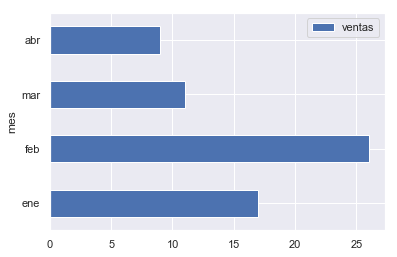

In [20]:
df.plot.barh("mes", "ventas");

### El método plot.line

El método [pandas.DataFrame.plot.line](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html) muestra una gráfica de lineas a partir de los datos contenidos en el dataframe:

In [21]:
df = pd.DataFrame({
    "mes": ["ene", "feb", "mar", "abr", "may", "jun"],
    "producto A": [17, 26, 11, 9, 10, 16],
    "producto B": [20, 22, 25, 23, 18, 10]
})

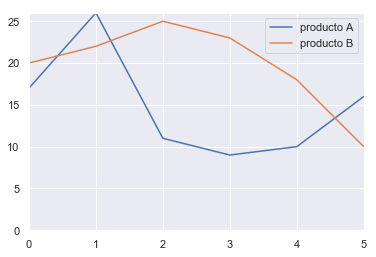

In [22]:
df.plot.line(ylim = (0, 26));

### El método plot.hist

El método [pandas.DataFrame.plot.hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html) muestra un histograma de los datos que se indique. Este método incluye dos parámetros principales (ambos opcionales): **by**, que deberá indicar la columna por la que agrupar los datos, y **bins**, que indicará el número de columnas o bins a crear:

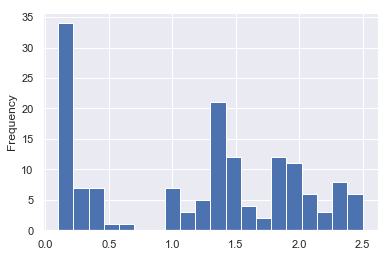

In [23]:
iris = sns.load_dataset("iris")
iris.petal_width.plot.hist(bins = 20);

Si, en nuestro ejemplo, indicamos el dataset completo y añadimos como parámetro **by** el campo *species*, se muestra un histograma para cada valor de este campo:

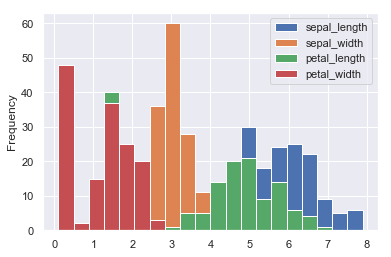

In [24]:
iris.plot.hist(by = "species", bins = 20);

### El método plot.box

El método [pandas.DataFrame.plot.box](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html) crea un diagrama de cajas con los datos indicados. El método incluye un parámetro principal, **by**, que indicará la columna por la que agrupar los datos:

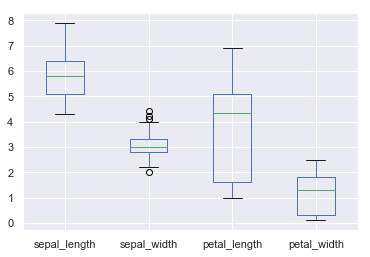

In [25]:
iris = sns.load_dataset("iris")
iris.plot.box(by = "species");

### El método plot.kde

El método [pandas.DataFrame.plot.kde](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html) genera un gráfico tipo **estimación de densidad kernel (KDE)**:

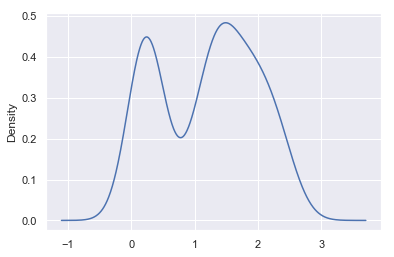

In [26]:
iris = sns.load_dataset("iris")
iris.petal_width.plot.kde();

### El método plot.area

El método [pandas.DataFrame.plot.area](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html) genera un gráfico de áreas. El parámetro **stacked** (que toma el valor *True* por defecto) indica si las áreas han de apilarse o no:

In [27]:
df = pd.DataFrame({
    "mes": ["ene", "feb", "mar", "abr", "may", "jun"],
    "producto A": [17, 26, 11, 9, 10, 16],
    "producto B": [20, 22, 25, 23, 18, 10]
})

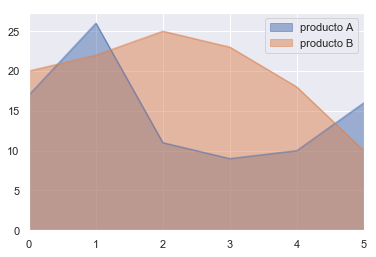

In [28]:
df.plot.area(stacked = False);

### El método plot.pie

El método [pandas.DataFrame.plot.pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html) genera un gráfico circular:

In [29]:
df = pd.DataFrame({
    "mes": ["ene", "feb", "mar", "abr"],
    "ventas": [17, 26, 11, 9]
})
df

,mes,ventas
0,ene,17
1,feb,26
2,mar,11
3,abr,9


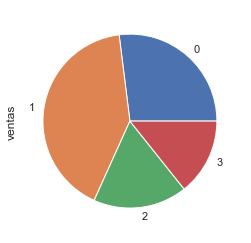

In [30]:
df.ventas.plot.pie();

### El método plot.scatter

El método [pandas.DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html) crea un diagrama de dispersión de las dos variables involucradas. Además de los parámetros **&#120;** e **&#121;** para referenciarlas, incluye el parámetro **&#115;** que determinará el tamaño de los puntos y el parámetro **&#99;**, que determinará el color de cada uno de ellos:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


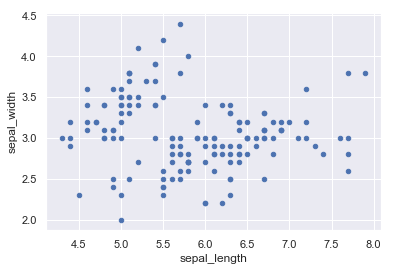

In [31]:
iris.plot.scatter("sepal_length", "sepal_width");

Si quisiéramos aplicar un color distinto a cada especie, tendríamos que "mapear" la columna "*species*" a un conjunto de colores:

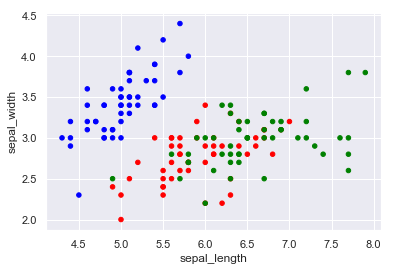

In [32]:
colors = {"versicolor": "red", "setosa": "blue", "virginica": "green"}
iris.plot.scatter("sepal_length", "sepal_width", c = iris.species.map(colors));

### El método plot.hexbin

El método [pandas.DataFrame.plot.hexbin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hexbin.html) crea un gráfico de dispersión hexagonal. El parámetro **gridsize** -tupla- determina el número de hexágonos a crear:

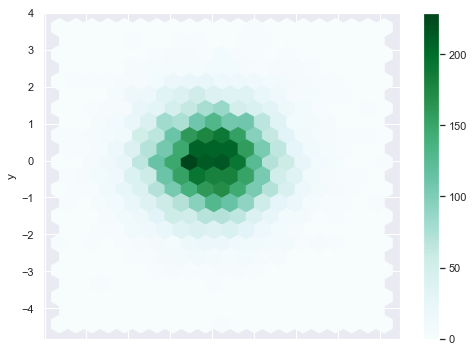

In [33]:
n = 10000
df = pd.DataFrame({
    'x': np.random.randn(n),
    'y': np.random.randn(n)
})
ax = df.plot.hexbin(x = 'x', y = 'y', gridsize = 20, figsize = (8, 6))